# Курсовая работа
## по курсу "Фундаментальные концепции искусственного интеллекта"

### Выполнил студент группы М8О-109СВ-24 Кучев Антон

Dataset: [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data)

Этот проект направлен на анализ того, как оценки студентов (test scores) зависят от различных переменных, таких как пол, этническая принадлежность, образование родителей, обед и подготовка к тесту.


In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Импорт CSV-данных в DataFrame
df = pd.read_csv('C:/Users/ivanm/Downloads/StudentsPerformance.csv')


In [208]:
df.head(20)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [209]:
df.shape

(1000, 8)

In [210]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


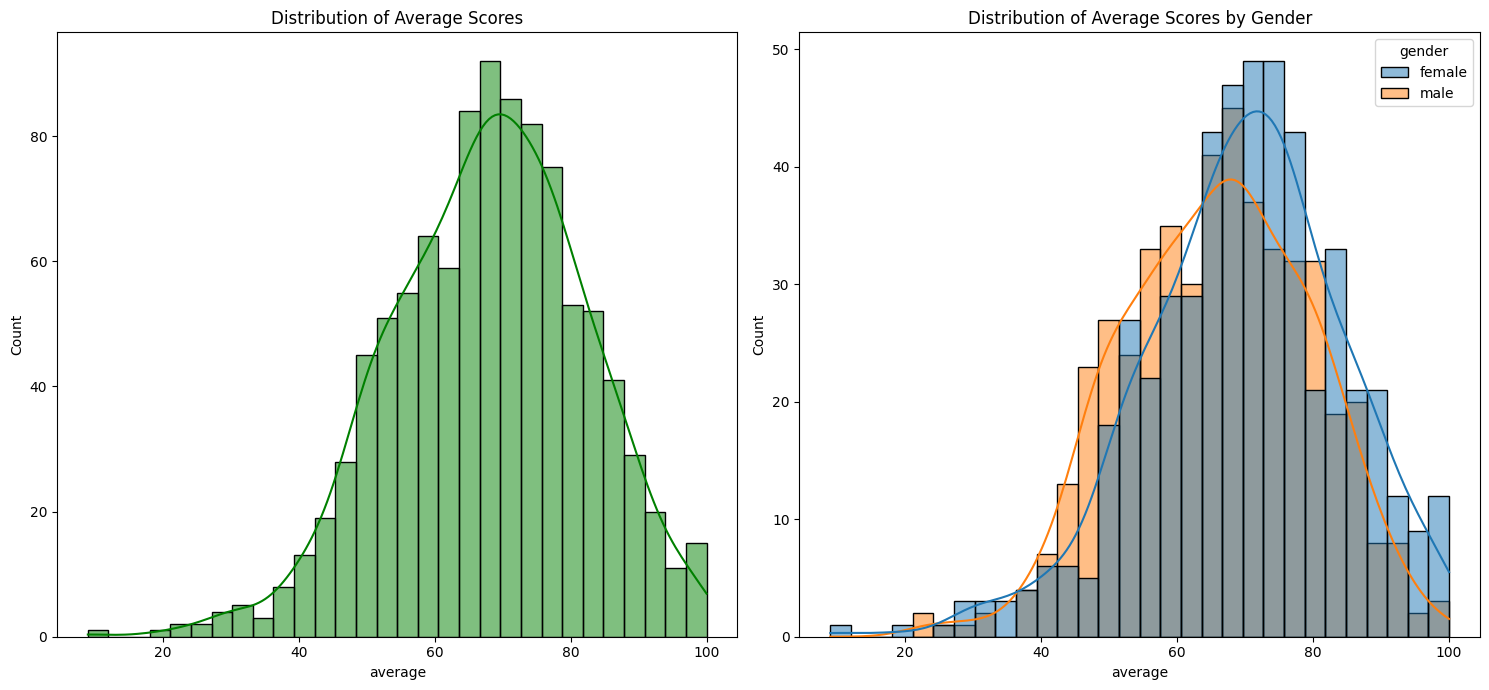

In [211]:
# Добавление столбцов для "Total Score" и "Average"
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3

# Создание графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Гистограмма и KDE для среднего балла
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Scores')

# Гистограмма и KDE для среднего балла с разделением по полу
sns.histplot(data=df, x='average', hue='gender', bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Average Scores by Gender')

plt.tight_layout()
plt.show()

In [212]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


In [213]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [214]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,0,1,1,1,1,72,72,74,218,72.666667
1,0,2,4,1,0,69,90,88,247,82.333333
2,0,1,3,1,1,90,95,93,278,92.666667
3,1,0,0,0,1,47,57,44,148,49.333333
4,1,2,4,1,1,76,78,75,229,76.333333
5,0,1,0,1,1,71,83,78,232,77.333333
6,0,1,4,1,0,88,95,92,275,91.666667
7,1,1,4,0,1,40,43,39,122,40.666667
8,1,3,2,0,0,64,64,67,195,65.000000
9,0,1,2,0,1,38,60,50,148,49.333333


In [215]:
df['test preparation course'].value_counts()

test preparation course
1    642
0    358
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2cdc74c2eb0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

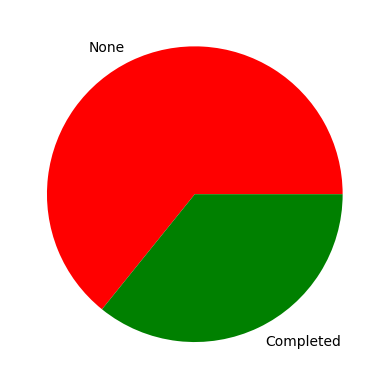

In [216]:
labels = ['None', 'Completed']
colors = ['red', 'green']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

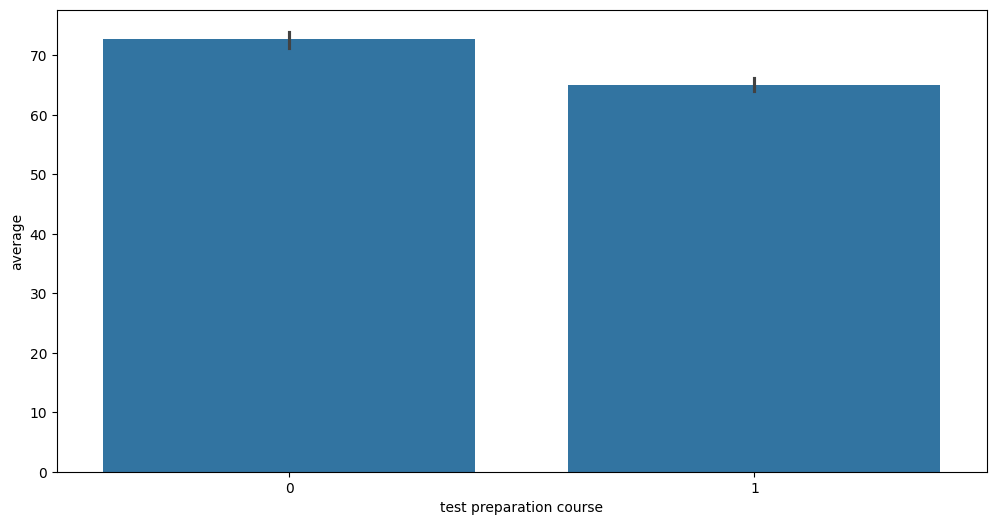

In [217]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'test preparation course', y = 'average', data = df)
plt.show()

<Axes: xlabel='lunch', ylabel='average'>

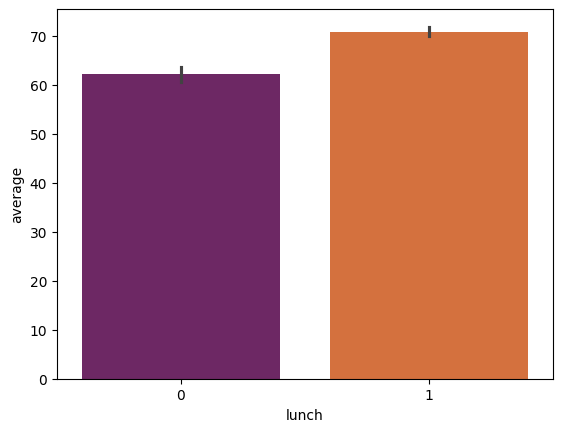

In [218]:
sns.barplot(x = df['lunch'], y = df['average'], palette = 'inferno')

<Axes: xlabel='parental level of education', ylabel='average'>

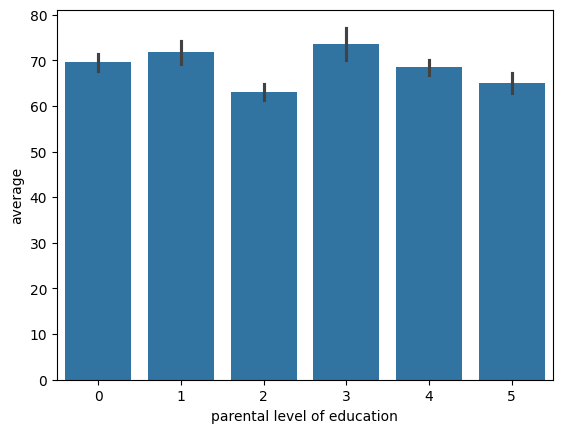

In [219]:
sns.barplot(x = 'parental level of education', y = 'average', data = df)

In [220]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.drop(['average'],axis = 1))

In [221]:
clustering = KMeans(n_clusters=3, random_state=42)
clustering.fit(X_pca)
labels = clustering.labels_

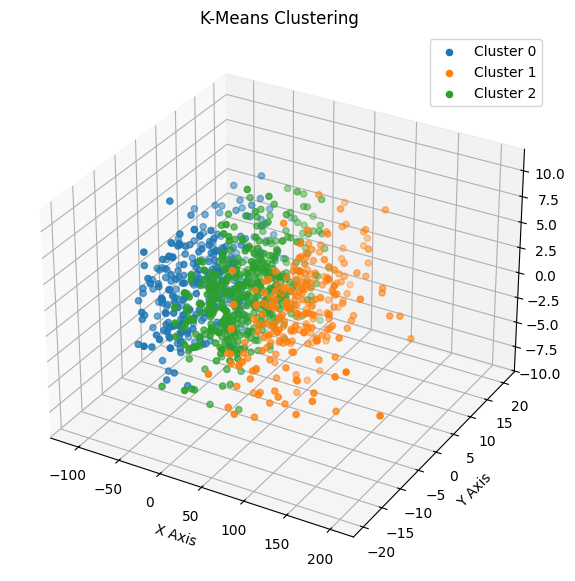

In [222]:
# Визуализация 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Отображение точек, цвет определяется меткой кластера
for cluster in range(3):
    cluster_points = [X_pca[i] for i in range(len(labels)) if labels[i] == cluster]
    cluster_points = np.array(cluster_points)
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f"Cluster {cluster}")

ax.set_title("K-Means Clustering")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.legend()
plt.show()

In [223]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total score,average
0,0,1,1,1,1,218,72.666667
1,0,2,4,1,0,247,82.333333
2,0,1,3,1,1,278,92.666667
3,1,0,0,0,1,148,49.333333
4,1,2,4,1,1,229,76.333333


In [224]:
from sklearn.model_selection import train_test_split
y = df['average']
x = df.drop(['average', 'total score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [225]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [226]:
# Построение модели регрессии
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Один выход для регрессии
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Обучение модели
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Оценка модели
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Предсказания
predictions = model.predict(x_test)
print(f"Predictions: {predictions[:5].flatten()}")
print(f"Actual: {y_test[:5]}")

Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 4721.1597 - mae: 67.2210 - val_loss: 4459.5952 - val_mae: 65.2792
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4358.4604 - mae: 64.4523 - val_loss: 3962.9741 - val_mae: 61.3979
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 3614.3816 - mae: 58.3149 - val_loss: 2942.0366 - val_mae: 52.4196
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 2360.9053 - mae: 45.6967 - val_loss: 1524.6750 - val_mae: 35.9011
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1082.9019 - mae: 28.2218 - val_loss: 585.9229 - val_mae: 19.6435
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 661.6356 - mae: 20.7705 - val_loss: 456.6926 - val_mae: 16.9076
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 638.3293 - mae: 20.1687 - val_loss: 439.2700 - val_mae: 16.7010
Epoch 8/100
25/25 [=============

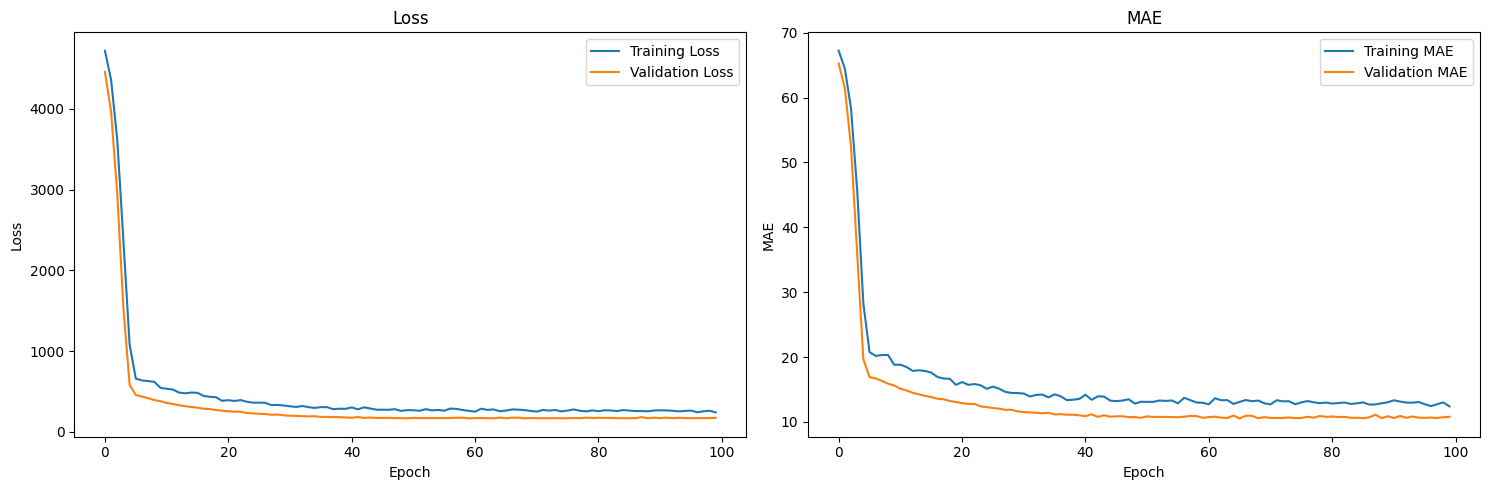

In [227]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Accuracy plot
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title('MAE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend()

plt.tight_layout()